In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install PyPDF2


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import PyPDF2

# Open the PDF file
with open('ICT.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)

    # Check number of pages
    num_pages = len(reader.pages)
    print(f"Total pages: {num_pages}")

    # Extract text from each page
    all_text = ""
    for page_num in range(num_pages):
        page = reader.pages[page_num]
        text = page.extract_text()
        all_text += f"\n--- Page {page_num + 1} ---\n"
        all_text += text if text else "[No extractable text]\n"

# Save the text to a .txt file (optional)
with open("ict_text_output.txt", "w", encoding="utf-8") as output_file:
    output_file.write(all_text)

# Print a preview
print(all_text[:1000])  # Show the first 1000 characters


Total pages: 2

--- Page 1 ---
At least 38% households in urban areas have internet access compared to 12% in
rural areas. Mobile phones are the most common used modes of accessing internet
at home (96%) followed by modems (4%).
Households not owning an ICT device may still use public ICT services such as public
internet service facilities and public phones. Only 1% of households use public
internet facilities in Rwanda (regularly and often). 
TABLE: Percentage of HH with internet access at home, and types of internet
connection
% of HH with internet access at
homeTypes of internet connectivity 
Mobile
phoneLandline/
LANModem Wireless
  17.2 95.8 0.1 3.8 0.3
Kigali City 39.1 93.5 0.0 5.9 0.6
Southern  11.7 95.8 0.2 3.8 0.2
Western  14.1 98.5 0.2 1.2 0.0
Northern 13.0 96.4 0.0 3.6 0.0
Eastern 14.4 97.1 0.0 2.7 0.2
Urban 38.1 92.5 0.0 6.9 0.6
Rural 12.2 98.3 0.1 1.5 0.1
--- Page 2 ---
The highest usage rate is found in Kigali City (2.5%) compared to other provinces;
this continuous reduc

In [6]:
import pandas as pd

# Step 1: Define the data
data = {
    'Region': ['Kigali City', 'Southern', 'Western', 'Northern', 'Eastern', 'Urban', 'Rural'],
    '% Internet Access': [39.1, 11.7, 14.1, 13.0, 14.4, 38.1, 12.2],
    'Mobile Phone': [93.5, 95.8, 98.5, 96.4, 97.1, 92.5, 98.3],
    'Landline/LAN': [0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.1],
    'Modem': [5.9, 3.8, 1.2, 3.6, 2.7, 6.9, 1.5],
    'Wireless': [0.6, 0.2, 0.0, 0.0, 0.2, 0.6, 0.1]
}

# Step 2: Create the DataFrame
df = pd.DataFrame(data)

# Preview the data
print(df.head())


        Region  % Internet Access  Mobile Phone  Landline/LAN  Modem  Wireless
0  Kigali City               39.1          93.5           0.0    5.9       0.6
1     Southern               11.7          95.8           0.2    3.8       0.2
2      Western               14.1          98.5           0.2    1.2       0.0
3     Northern               13.0          96.4           0.0    3.6       0.0
4      Eastern               14.4          97.1           0.0    2.7       0.2


In [7]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')


In [8]:
df.dropna(inplace=True)  # This is safe — just removes empty rows if there are any


In [10]:
print(df.columns.tolist())


['region', '%_internet_access', 'mobile_phone', 'landline_lan', 'modem', 'wireless']


In [11]:
df.rename(columns={'%_internet_access': 'percent_internet_access'}, inplace=True)


In [12]:
numeric_columns = ['percent_internet_access', 'mobile_phone', 'landline_lan', 'modem', 'wireless']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [13]:
print(df.dtypes)
print(df.head())


region                      object
percent_internet_access    float64
mobile_phone               float64
landline_lan               float64
modem                      float64
wireless                   float64
dtype: object
        region  percent_internet_access  mobile_phone  landline_lan  modem  \
0  Kigali City                     39.1          93.5           0.0    5.9   
1     Southern                     11.7          95.8           0.2    3.8   
2      Western                     14.1          98.5           0.2    1.2   
3     Northern                     13.0          96.4           0.0    3.6   
4      Eastern                     14.4          97.1           0.0    2.7   

   wireless  
0       0.6  
1       0.2  
2       0.0  
3       0.0  
4       0.2  


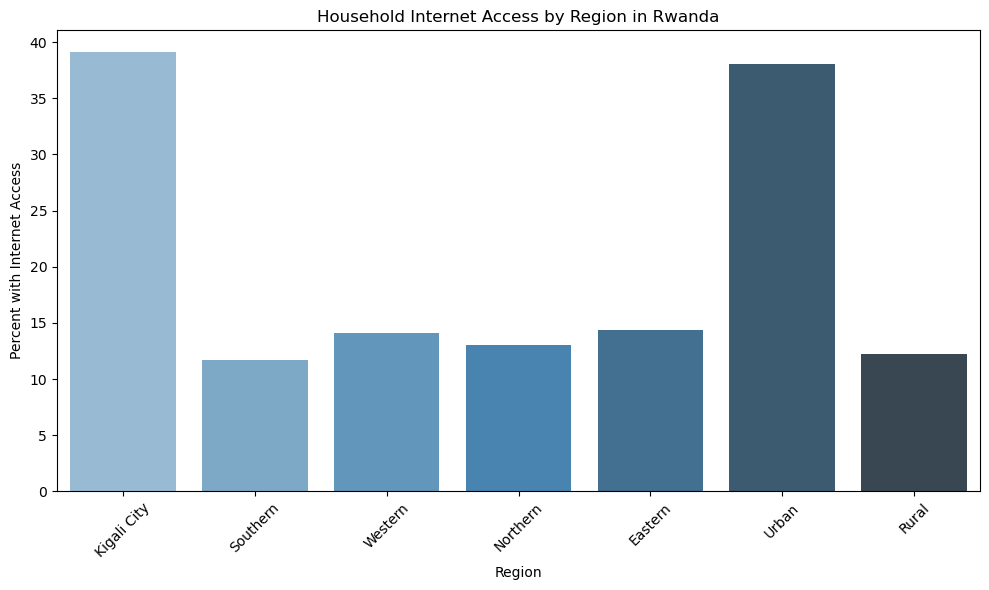

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Assign hue=x and suppress the legend to avoid the warning
sns.barplot(data=df, x='region', y='percent_internet_access', hue='region', palette='Blues_d', legend=False)

plt.title('Household Internet Access by Region in Rwanda')
plt.xlabel('Region')
plt.ylabel('Percent with Internet Access')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Internet Access by Region 
In this visualization, we plotted the percentage of households with internet access across different regions in Rwanda 
- Kigali City has the highest internet access (39.1%), significantly ahead of all other regions.
- All other provinces remain below 15%, indicating regional disparities in connectivity.


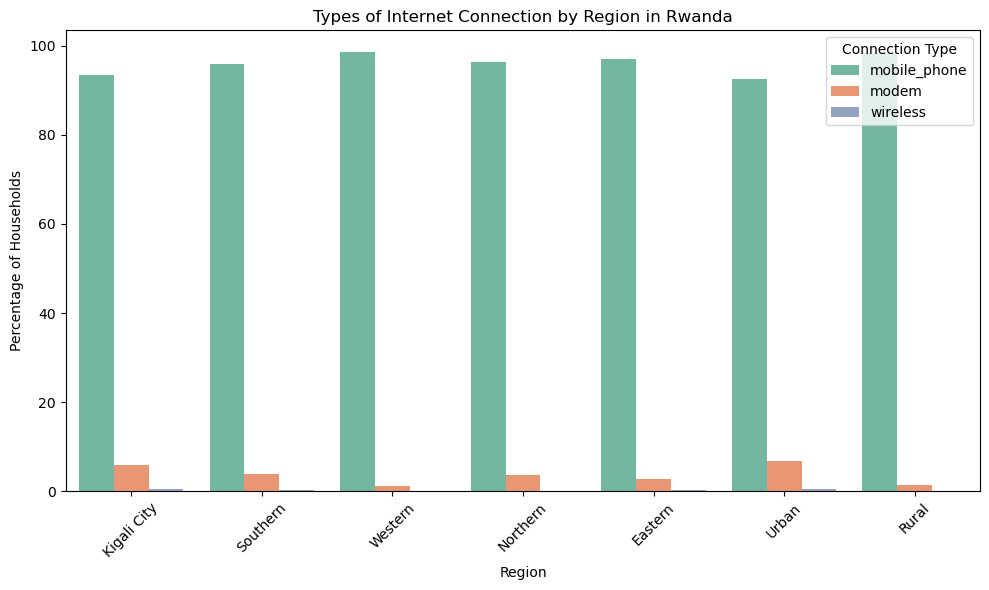

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the data to long format for easier plotting
df_long = df.melt(id_vars='region',
                  value_vars=['mobile_phone', 'modem', 'wireless'],
                  var_name='connection_type',
                  value_name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='region', y='percentage', hue='connection_type', palette='Set2')

plt.title('Types of Internet Connection by Region in Rwanda')
plt.xlabel('Region')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Connection Type')
plt.tight_layout()
plt.show()


Internet Connection Type Insights
- Mobile phones are the primary mode of internet access across all regions.
- Modem usage is higher in Kigali compared to other provinces.
- Wireless usage is very limited outside Kigali.


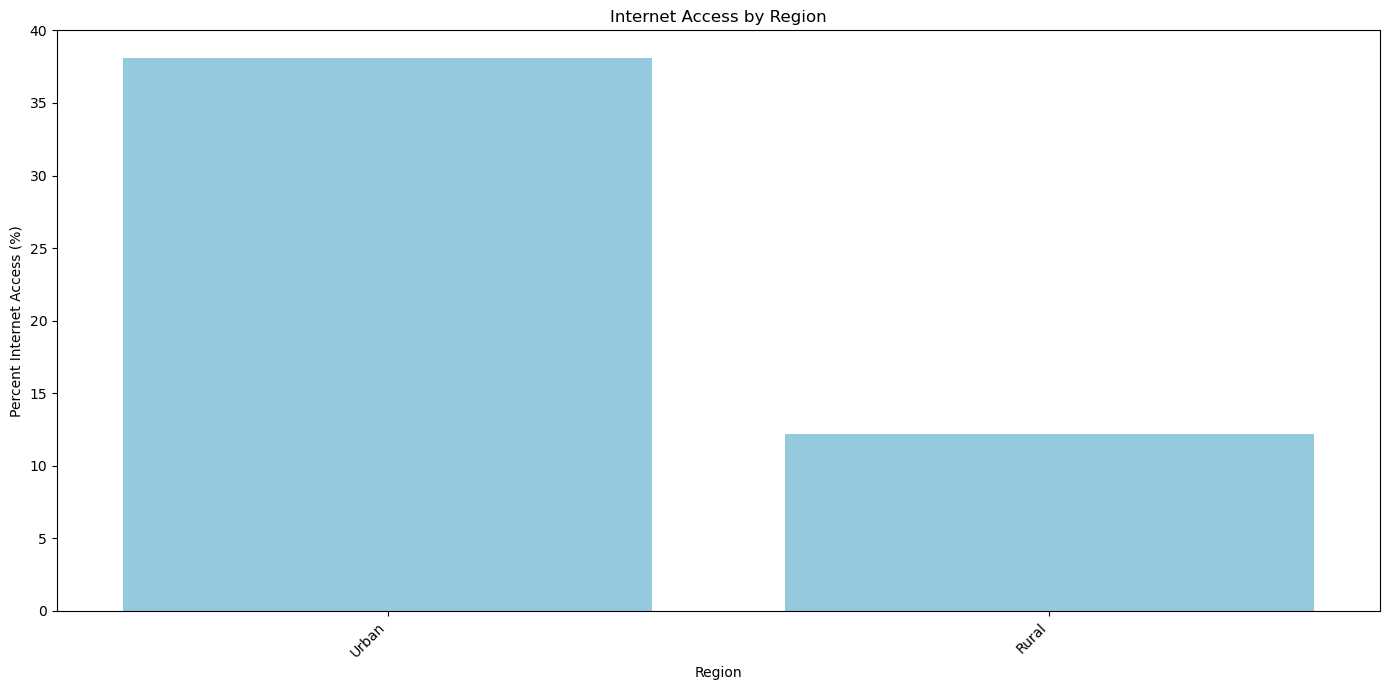

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better spacing
plt.figure(figsize=(14, 7))

# Create barplot without hue to avoid palette warnings
sns.barplot(data=df_urban_rural, x='region', y='percent_internet_access', color='skyblue')

# Set plot title and axis labels
plt.title('Internet Access by Region')
plt.xlabel('Region')
plt.ylabel('Percent Internet Access (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to fit labels and title
plt.tight_layout()

# Display the plot
plt.show()


 Urban vs Rural Access Insight
- Internet access is over 3 times higher in urban areas (38.1%) than rural areas (12.2%).
- This highlights a significant digital divide, suggesting a need for better rural connectivity infrastructure.


In [32]:
# Melt connection types into long format
df_conn = df.melt(id_vars='region',
                  value_vars=['mobile_phone', 'modem', 'wireless'],
                  var_name='category',
                  value_name='value')

# Add the internet_access row separately
df_internet = df[['region', 'percent_internet_access']].copy()
df_internet['category'] = 'internet_access'
df_internet.rename(columns={'percent_internet_access': 'value'}, inplace=True)

# Combine both
df_combined = pd.concat([df_conn, df_internet], ignore_index=True)

# Export as one CSV
df_combined.to_csv('rwanda_ict_combined.csv', index=False)
